In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.feature_selection import SelectKBest, f_regression

In [52]:
train = pd.read_csv('Train.csv')
train.head()

,Per Student Funding(USD),Test Performance(%),Classroom Ratio,Low-Income Rate (%),Connectivity Rate (%),School Dropout (%),Diversity Rate (%)
0,17995.51486,50.616212,18.023624,68.168177,69.113964,1.604255,48.006275
1,11689.23744,46.041003,15.191602,46.131005,87.913586,0.740963,56.350199
2,19779.66264,63.317402,23.372859,37.472473,101.250322,8.900814,68.705602
3,17837.19393,78.581923,18.092028,48.378386,60.120687,-5.214861,78.297445
4,15733.39175,92.504305,22.426376,61.897801,88.066737,3.717773,73.792760


In [53]:
train.shape

(14700, 7)

In [54]:
train.isnull().sum()

Per Student Funding(USD)     0
Test Performance(%)          0
Classroom Ratio              0
Low-Income Rate (%)          0
Connectivity Rate (%)        0
School Dropout (%)           0
Diversity Rate (%)           0
dtype: int64

In [55]:
train.duplicated().sum()

0

In [56]:
train.describe()

,Per Student Funding(USD),Test Performance(%),Classroom Ratio,Low-Income Rate (%),Connectivity Rate (%),School Dropout (%),Diversity Rate (%)
count,14700.000000,14700.000000,14700.000000,14700.000000,14700.000000,14700.000000,14700.000000
mean,15268.913871,70.228092,20.200533,54.267529,74.610153,7.920468,50.093686
std,5916.000949,17.632782,5.771417,24.597131,14.445575,4.194316,26.050654
min,-10593.411860,-2.449913,-1.689505,-40.581485,18.707233,-8.282535,-49.405451
25%,11415.348818,58.299919,16.356119,37.689892,64.786941,5.078449,32.402684
50%,15231.718335,69.954503,20.224745,54.221808,74.543051,7.973299,50.343994
75%,19181.685900,82.100600,24.101931,70.831080,84.366057,10.751051,67.823299
max,35733.909850,149.743641,44.658630,145.170503,128.694284,23.513298,145.759553


In [57]:
test = pd.read_csv('Test.csv')
test.head()

,Per Student Funding(USD),Test Performance(%),Classroom Ratio,Low-Income Rate (%),Connectivity Rate (%),School Dropout (%),Diversity Rate (%)
0,15724.388930,60.806753,14.702170,71.002171,76.072673,10.964144,NaN
1,14740.026620,107.979847,24.033725,84.329638,71.712362,6.762501,NaN
2,3520.555536,51.857149,19.245079,64.562618,85.788766,11.032276,NaN
3,18508.990270,55.190317,13.346302,116.179627,95.158741,10.833485,NaN
4,14932.335600,102.821108,19.018740,68.174215,77.436701,8.040940,NaN


In [58]:
test.shape

(300, 7)

In [59]:
test.isnull().sum()

Per Student Funding(USD)       0
Test Performance(%)            0
Classroom Ratio                0
Low-Income Rate (%)            0
Connectivity Rate (%)          0
School Dropout (%)             0
Diversity Rate (%)           300
dtype: int64

In [60]:
test.duplicated().sum()

0

In [61]:
combined = pd.concat([train, test], axis = 0)
combined.shape

(15000, 7)

C:\Users\ahpat\AppData\Local\Temp\ipykernel_16476\395857070.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Diversity Rate (%)'], kde = True)


<Axes: xlabel='Diversity Rate (%)', ylabel='Density'>

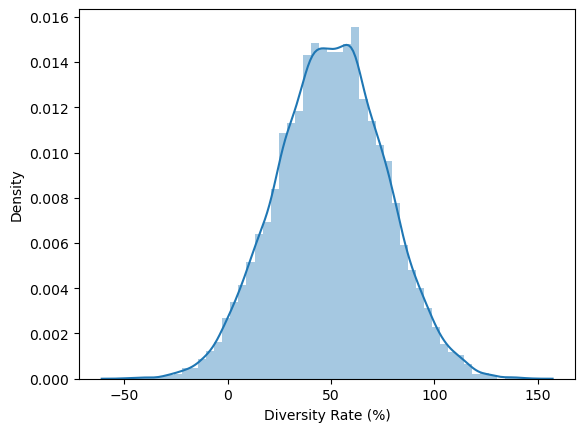

In [62]:
sns.distplot(train['Diversity Rate (%)'], kde = True)

In [63]:
input_variables = combined.drop('Diversity Rate (%)', axis = 1)

In [64]:
def replace_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3-q1
    lower = q1-1.5*iqr
    upper = q3+1.5*iqr
    median_value = df[column].median()
    df[column] = np.where((df[column]<lower)|(df[column]>upper), median_value, df[column])
    return df

In [65]:
for col in input_variables.columns:
    concat_df = replace_outliers(combined, col)

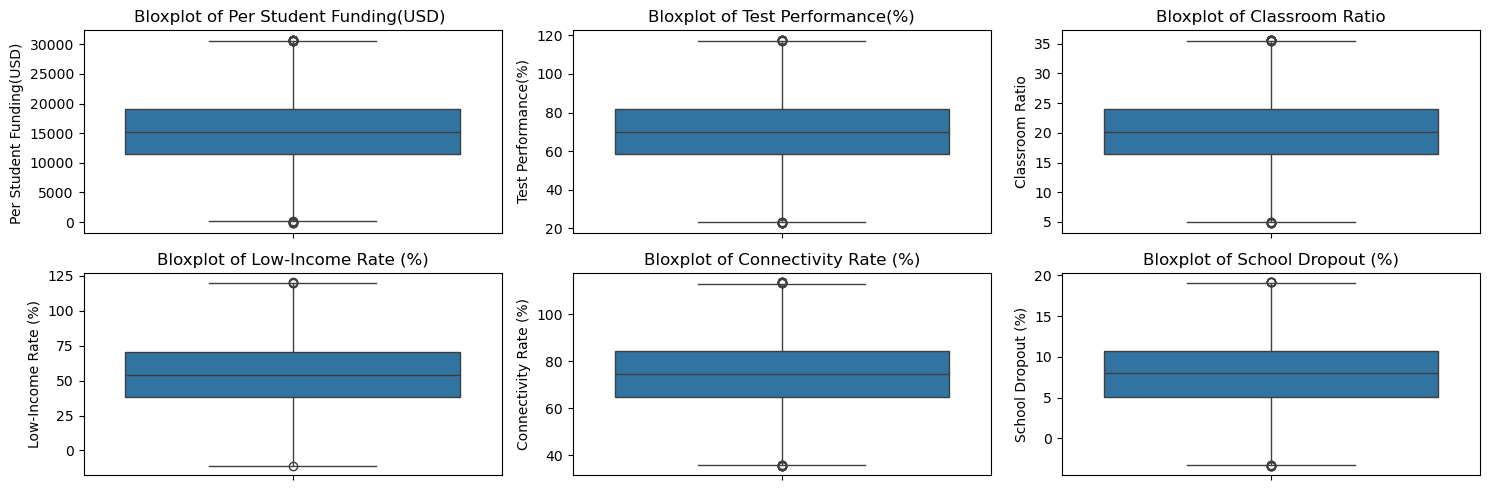

In [66]:
fig, axes = plt.subplots(2, 3, figsize=(15,5))
axes = axes.flatten()

for i, col in enumerate(input_variables.columns):
    sns.boxplot(data = combined, y=col, ax=axes[i])
    axes[i].set_title(f'Bloxplot of {col}')

plt.tight_layout()
plt.show()

In [67]:
combined['funding_performance_ratio'] = combined['Per Student Funding(USD) '] / (combined['Test Performance(%)'] + 1e-5)
combined['dropout_low_income_ratio'] = combined['School Dropout (%)'] / (combined['Low-Income Rate (%)'] + 1e-5)
combined['connectivity_classroom_interaction'] = combined['Connectivity Rate (%)'] * combined['Classroom Ratio']
combined['funding_per_classroom'] = combined['Per Student Funding(USD) '] / (combined['Classroom Ratio'] + 1e-5)
combined['performance_connectivity'] = combined['Test Performance(%)'] * combined['Connectivity Rate (%)']
combined['dropout_squared'] = combined['School Dropout (%)'] ** 2
combined['inverse_low_income'] = 1 / (combined['Low-Income Rate (%)'] + 1e-5)
combined['funding_dropout_interaction'] = combined['Per Student Funding(USD) '] * combined['School Dropout (%)']
combined['connectivity_dropout_ratio'] = combined['Connectivity Rate (%)'] / (combined['School Dropout (%)'] + 1e-5)
combined['performance_per_classroom'] = combined['Test Performance(%)'] / (combined['Classroom Ratio'] + 1e-5)
combined['socio_economic_stress'] = combined['Low-Income Rate (%)'] + combined['School Dropout (%)']

In [68]:
newtrain = combined.iloc[0:14700, :]
newtest = combined.iloc[14700:, :].drop('Diversity Rate (%)', axis = 1)

In [69]:
newtrain.head()

,Per Student Funding(USD),Test Performance(%),Classroom Ratio,Low-Income Rate (%),Connectivity Rate (%),School Dropout (%),Diversity Rate (%),funding_performance_ratio,dropout_low_income_ratio,connectivity_classroom_interaction,funding_per_classroom,performance_connectivity,dropout_squared,inverse_low_income,funding_dropout_interaction,connectivity_dropout_ratio,performance_per_classroom,socio_economic_stress
0,17995.51486,50.616212,18.023624,68.168177,69.113964,1.604255,48.006275,355.528608,0.023534,1245.684115,998.439859,3498.287022,2.573635,0.014670,28869.398219,43.081383,2.808324,69.772432
1,11689.23744,46.041003,15.191602,46.131005,87.913586,0.740963,56.350199,253.887496,0.016062,1335.548215,769.453397,4047.629677,0.549026,0.021677,8661.290770,118.646163,3.030686,46.871968
2,19779.66264,63.317402,23.372859,37.472473,101.250322,8.900814,68.705602,312.388995,0.237529,2366.509445,846.265943,6410.907305,79.224492,0.026686,176055.100673,11.375387,2.709013,46.373287
3,17837.19393,78.581923,18.092028,48.378386,60.120687,7.976986,78.297445,226.988486,0.164887,1087.705150,985.914030,4724.399206,63.632302,0.020670,142287.041844,7.536758,4.343453,56.355372
4,15733.39175,92.504305,22.426376,61.897801,88.066737,3.717773,73.792760,170.082787,0.060063,1975.017762,701.557158,8146.552262,13.821834,0.016156,58493.173792,23.687973,4.124798,65.615574


In [70]:
newtrain.shape

(14700, 18)

In [95]:
newtest.shape

(300, 17)

In [97]:
X = newtrain.drop(columns=['Diversity Rate (%)'])
y = newtrain['Diversity Rate (%)']
k = 12  
selector = SelectKBest(score_func=f_regression, k=k)
selector.fit(X, y)
mask = selector.get_support()
selected_features = X.columns[mask]
print(f"Top {k} selected features:")
print(selected_features)

Top 12 selected features:
Index(['Per Student Funding(USD) ', 'Test Performance(%)',
       'Low-Income Rate (%)', 'Connectivity Rate (%)', 'School Dropout (%)',
       'funding_performance_ratio', 'dropout_low_income_ratio',
       'funding_per_classroom', 'performance_connectivity', 'dropout_squared',
       'connectivity_dropout_ratio', 'socio_economic_stress'],
      dtype='object')


In [99]:
correlation_matrix = newtrain.corr()
target_corr = correlation_matrix["Diversity Rate (%)"].sort_values(ascending=False)
print(target_corr)

Diversity Rate (%)                    1.000000
funding_per_classroom                 0.005865
Per Student Funding(USD)              0.005528
funding_performance_ratio             0.004618
Test Performance(%)                   0.003530
Classroom Ratio                       0.002189
funding_dropout_interaction           0.002032
performance_per_classroom             0.001389
inverse_low_income                   -0.000981
connectivity_classroom_interaction   -0.002676
dropout_low_income_ratio             -0.002821
dropout_squared                      -0.003197
School Dropout (%)                   -0.004091
performance_connectivity             -0.005918
Low-Income Rate (%)                  -0.006769
socio_economic_stress                -0.007325
connectivity_dropout_ratio           -0.009977
Connectivity Rate (%)                -0.011872
Name: Diversity Rate (%), dtype: float64


In [103]:
x = newtrain[['funding_per_classroom', 'Per Student Funding(USD) ', 'funding_performance_ratio', 'Test Performance(%)', 'Classroom Ratio', 
             'funding_dropout_interaction', 'performance_per_classroom']]
y = newtrain['Diversity Rate (%)']

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [107]:
models = {'Linear Regression': LinearRegression(), 'Random Forest': RandomForestRegressor(),
         'Bagging': BaggingRegressor(), 'Extra Tree': ExtraTreesRegressor(), 'LightGBM': LGBMRegressor(),
         'Gradient Boosting': GradientBoostingRegressor(), 'Adaboost': AdaBoostRegressor(),
         'XGB': XGBRegressor(), 'lasso': Lasso(), 'ridge' : Ridge()}

In [109]:
def evaluate_models(x_train, x_test, y_train, y_test, models):
    results = {}
    for name, model in models.items():
        predictions = model.fit(x_train, y_train).predict(x_test)
        accuracy = np.sqrt(mean_squared_error(y_test, predictions))
        results[name] = accuracy
    return results

In [111]:
results = evaluate_models(x_train, x_test, y_train, y_test, models)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 11760, number of used features: 7
[LightGBM] [Info] Start training from score 50.024266


In [112]:
best_model_name = min(results, key = results.get)
best_model = models[best_model_name]

In [113]:
print(f"best model is {best_model_name} with r2_square {results[best_model_name]}")

best model is ridge with r2_square 26.20927796951063


In [117]:
y_pred = best_model.fit(x_train, y_train).predict(x_test)

In [119]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

26.20927796951063


In [121]:
x_train = newtrain.drop('Diversity Rate (%)', axis = 1)
y_train = newtrain['Diversity Rate (%)']
x_test = newtest
y_pred = best_model.fit(x_train, y_train).predict(x_test)

In [123]:
solution = pd.DataFrame({'Diversity Rate (%)': y_pred})
solution.head()

,Diversity Rate (%)
0,49.640660
1,50.626796
2,48.880399
3,48.935544
4,50.060514


In [127]:
solution.to_csv('Solution.csv', index = False)